<a href="https://colab.research.google.com/github/carlibeisel/mason_water_budget/blob/main/04_reach_pet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


By Carli Beisel

Created August 2024

Purpose: Calculates open-water evapiration for irrigation systems in Mason using IDWR monthly open-water evaporation estimates.


In [ ]:
#-------------------------------------------#
#     Import Packages & Connect to Drive    #
#-------------------------------------------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/pet/reach_pet.csv')
reach_pet = file['PET (af/month)']
reaches = file['Reach']
months = file['Month']

<ipython-input-9-5aeb19115b94>:21: UserWarning: 
The markers list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


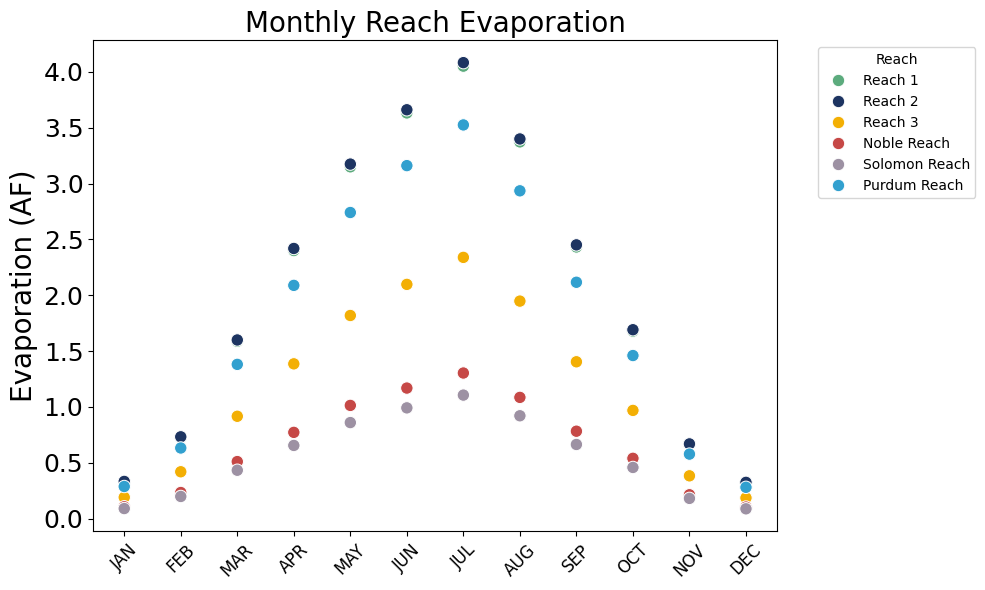

In [ ]:
file = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/pet/reach_pet.csv')

reach_colors = {
    "Reach 1": "#5CAB7D",
    "Reach 2": "#1D3461",
    "Reach 3": "#F3AF04",
    "Purdum Reach": "#32A0CF",
    "Solomon Reach": "#9D91A3",
    "Noble Reach": "#C64846"
}

# Map the 'Month' column using the month_map dictionary
file['Month'] = file['Month'].map({
    1: 'JAN', 2: 'FEB', 3: 'MAR', 4: 'APR',
    5: 'MAY', 6: 'JUN', 7: 'JUL', 8: 'AUG',
    9: 'SEP', 10: 'OCT', 11: 'NOV', 12: 'DEC'
})

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=file,
    x='Month',
    y='PET (af/month)',
    hue='Reach',
    style='Reach',
    palette=reach_colors,
    markers=['o'],
    s=80
)

# Customize the plot
plt.title('Monthly Reach Evaporation', fontsize=20)
plt.xlabel('', fontsize=14)
plt.ylabel('Evaporation (AF)', fontsize=20)
plt.xticks(fontsize=22)
plt.yticks(fontsize=18)

# Move the legend outside of the plot
plt.legend(title='Reach', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Show the plot
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Budget/reach_pet.png', dpi=300, bbox_inches='tight')
plt.show()

## Mason Drainage combined precip

In [ ]:
file = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/pet/reach_pet.csv')

# Sum evaporation estiamtes for all reaches in Mason
reach_evap = file.groupby('Month', as_index=False)['Reach Evap (AF)'].sum()
mason_evap = pd.DataFrame({'Month': reach_evap['Month'], 'Evap (AF)': reach_evap['Reach Evap (AF)']})
mason_evap.to_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/pet_out/mason_pet.csv', index=False)